In [1]:
import pandas as pd
import unicodedata
import re
import numpy as np

df = pd.read_excel(r"C:\Users\primo\Downloads\Pedido de atención SM - CeSAC 24 (respuestas).xlsx", sheet_name="Respuestas de formulario 1")

In [2]:
# Primero, limpiamos la columna 'Edad' para extraer el número
def extraer_edad(valor):
    if isinstance(valor, str):
        match = re.search(r'\d+', valor)
        if match:
            return int(match.group())
    elif isinstance(valor, (int, float)):
        return int(valor)
    return None

df['Edad_num'] = df['Edad'].apply(extraer_edad)

# Definimos los bins y las etiquetas
bins = [0, 5, 11, 17, 49, float('inf')]
labels = ['0-5', '6-11', '12-17', '18-49', '50+']

df['rango_edad'] = pd.cut(df['Edad_num'], bins=bins, labels=labels, right=True, include_lowest=True)

In [3]:
df['Lo que motiva la derivación es:'] = df['Lo que motiva la derivación es:'].str.replace('Empeoramiento de un problema crónico. Violencia. Amenaza con tijeras.', 'Empeoramiento de un problema crónico', regex=False)

C:\Users\primo\AppData\Local\Temp\ipykernel_11000\334125863.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='rango_edad', order=labels, palette='viridis')
C:\Users\primo\AppData\Local\Temp\ipykernel_11000\334125863.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(label) for label in labels])
C:\Users\primo\AppData\Local\Temp\ipykernel_11000\334125863.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(label) for label in labels])
C:\Users\primo\AppData\Local\Temp\ipykernel_11000\334125863.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or

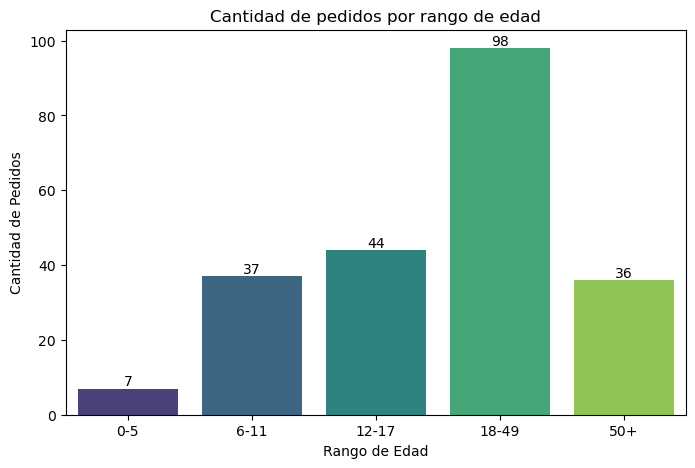

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Gráfico de barras de cantidad de registros por rango_edad con etiquetas de datos
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='rango_edad', order=labels, palette='viridis')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Pedidos')
plt.title('Cantidad de pedidos por rango de edad')

# Agregar etiquetas de datos en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')
    # Cambiar las etiquetas del eje x para que se vean como enteros (sin .0)
    ax.set_xticklabels([str(label) for label in labels])
plt.show()


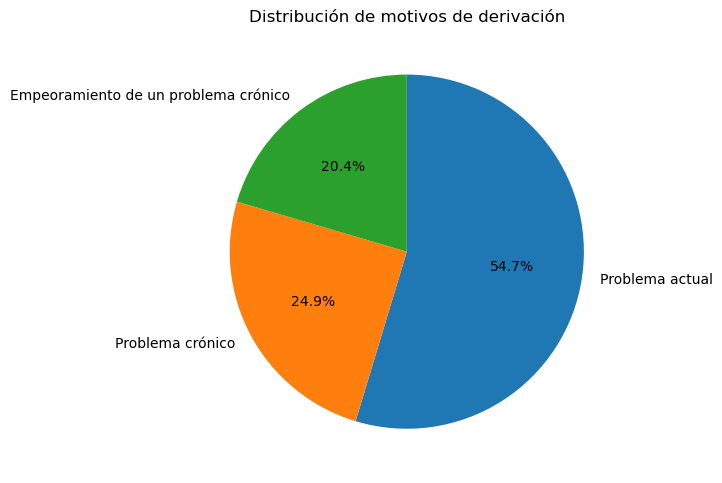

In [5]:
# Gráfico circular de la columna "Lo que motiva la derivación es:"
plt.figure(figsize=(7, 7))
motivos_counts = df['Lo que motiva la derivación es:'].value_counts()
motivos_counts.plot.pie(autopct=lambda pct: f"{pct:.1f}%", startangle=90, counterclock=False)
plt.ylabel('')
plt.title('Distribución de motivos de derivación')
plt.tight_layout()
plt.show()

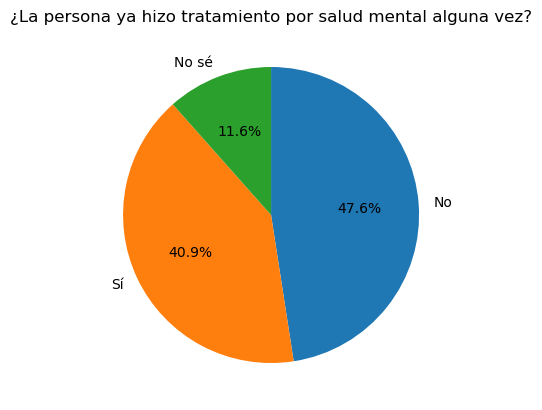

In [6]:
# Gráfico circular de la columna "¿La persona ya hizo tratamiento por salud mental alguna vez?"
plt.figure(figsize=(4, 6))
tratamiento_counts = df['¿La persona ya hizo tratamiento por salud mental alguna vez?'].value_counts()
tratamiento_counts.plot.pie(
    autopct=lambda pct: f"{pct:.1f}%", 
    startangle=90, 
    counterclock=False
)
plt.ylabel('')
plt.title('¿La persona ya hizo tratamiento por salud mental alguna vez?')
plt.tight_layout()
plt.show()

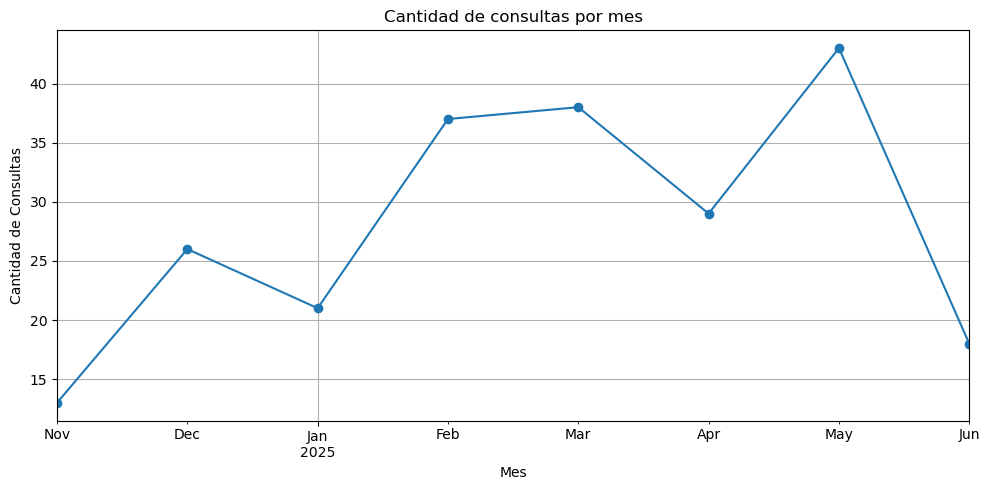

In [7]:
# Agrupar por mes y contar la cantidad de consultas
df['mes'] = df['Marca temporal'].dt.to_period('M')
consultas_por_mes = df.groupby('mes').size()

plt.figure(figsize=(10, 5))
consultas_por_mes.plot(marker='o')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Consultas')
plt.title('Cantidad de consultas por mes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Crear una columna con la semana del año ESTA LÍNEA YA LA PUSE, LAS DEMÁS DE ESTA CELDA NO
df['semana'] = df['Marca temporal'].dt.to_period('W')

# Crear tabla dinámica: filas=mes, columnas=semana, valores=cantidad de pedidos
pivot = df.pivot_table(index='mes', columns='semana', values='DNI', aggfunc='count', fill_value=0)

# Ordenar las columnas por semana
pivot = pivot.reindex(sorted(pivot.columns), axis=1)



In [9]:
# Crear gráfico de columnas apiladas por mes, secciones por semana (mismo color para cada semana)
plt.figure(figsize=(12, 6))

# Seleccionar los primeros 5 colores para las 5 semanas
colores_semanas = colores[:max_semanas]

# Para cada semana (columna en el pivot), sumar por mes y apilar
bottom = np.zeros(len(pivot))
for i, semana_label in enumerate(semana_labels):
    # Seleccionar las columnas del pivot que corresponden a la semana i+1
    cols_semana = [col for idx, col in enumerate(pivot.columns) if semana_num[idx] == i+1]
    # Sumar los valores de esas columnas para cada mes
    valores = pivot[cols_semana].sum(axis=1)
    plt.bar(pivot.index.astype(str), valores, bottom=bottom, color=colores_semanas[i], label=semana_label)
    bottom += valores

plt.xlabel('Mes')
plt.ylabel('Cantidad de Pedidos')
plt.title('Pedidos por mes y semana (colores fijos por semana)')
plt.legend(title='Semana del mes')
plt.tight_layout()
plt.show()

NameError: name 'colores' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
semana = df.groupby('semana').count()['DNI'].reset_index()
semana.head()

,semana,DNI
0,2024-11-18/2024-11-24,3
1,2024-11-25/2024-12-01,10
2,2024-12-02/2024-12-08,9
3,2024-12-09/2024-12-15,8
4,2024-12-16/2024-12-22,7


In [ ]:
semana = semana.rename(columns={'DNI': 'Cantidad de consultas'})
semana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype        
---  ------                 --------------  -----        
 0   semana                 32 non-null     period[W-SUN]
 1   Cantidad de consultas  32 non-null     int64        
dtypes: int64(1), period[W-SUN](1)
memory usage: 644.0 bytes


In [ ]:
promedio_consultas_semanales = semana['Cantidad de consultas'].mean()
print(f"Promedio de consultas semanales: {promedio_consultas_semanales:.2f}")

Promedio de consultas semanales: 7.03
